In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_dataset = pd.read_csv('wine_data.csv')

In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

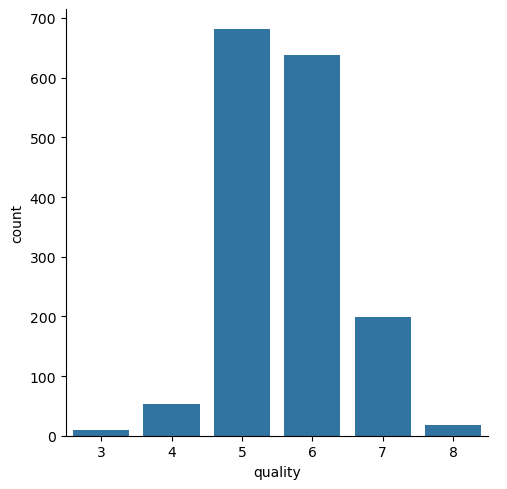

In [13]:
## we can make the bar chart of the quality column using the data found above or can also make directly using the seaborn library

sns.catplot(x='quality', data=wine_dataset, kind='count')

<Figure size 500x500 with 0 Axes>

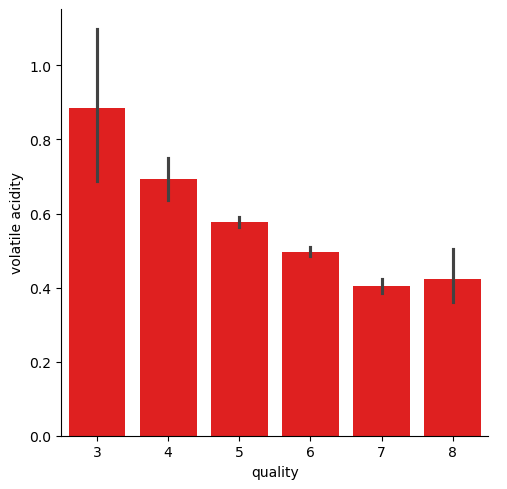

In [14]:
## volatile acidity vs quality
plt.figure(figsize=(5, 5))
sns.catplot(x='quality', y='volatile acidity', data=wine_dataset, kind='bar', color='red')

<Figure size 500x500 with 0 Axes>

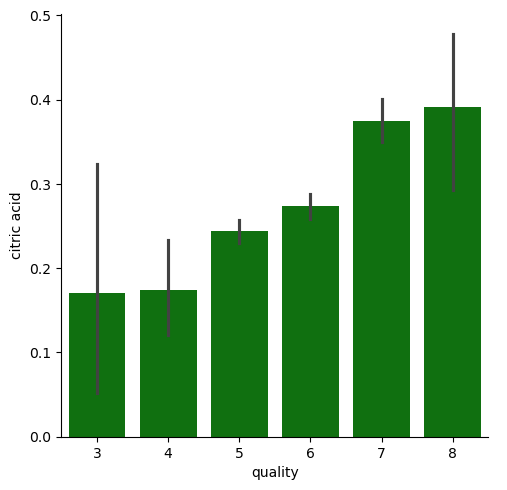

In [15]:
## citric acid vs quality 

plt.figure(figsize=(5, 5))
sns.catplot(x='quality', y='citric acid', data=wine_dataset, kind='bar', color='green')

<Axes: >

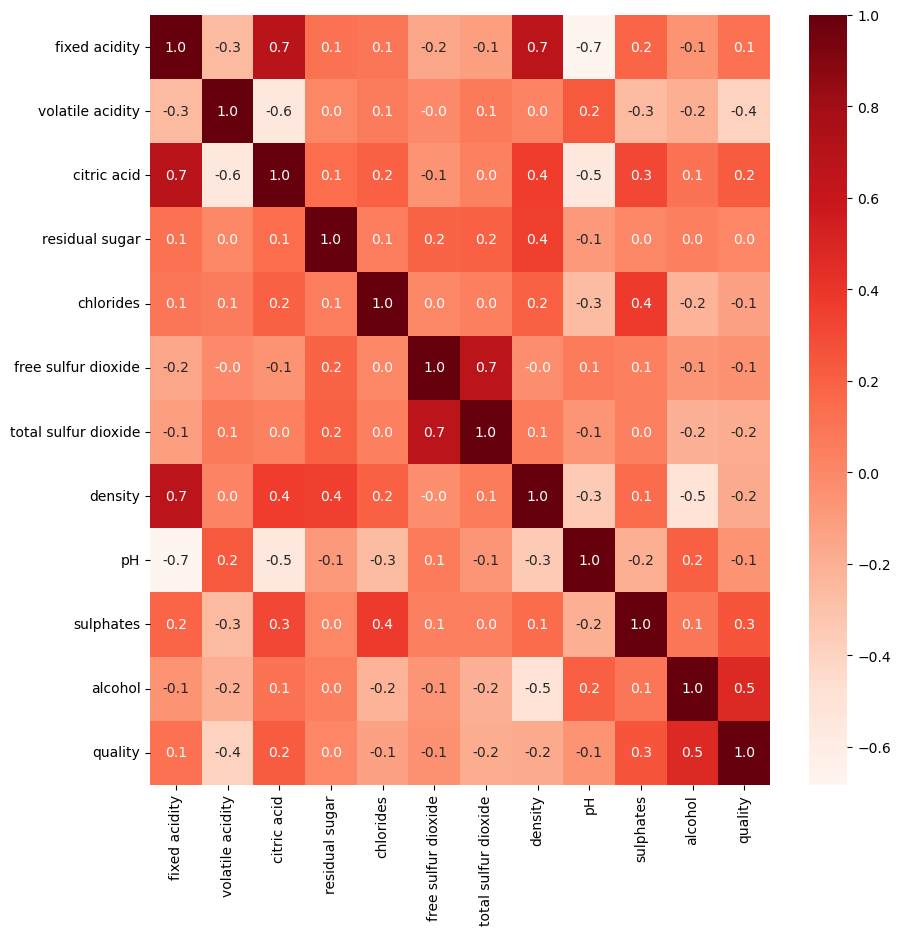

In [16]:
## finding the correlation between the features
correlation = wine_dataset.corr()

## one is positive and other is negative correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, fmt='.1f', cmap='Reds')

### data preprocessing

In [17]:
X = wine_dataset.drop('quality', axis=1)
y = wine_dataset['quality']

In [18]:
## now we will be modifing the quality column to make it binary classification problem
Y = wine_dataset['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [22]:
## Accuracy on the test data 
X_test_prediction = model.predict(X_test)
accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Accuracy of the model is: {accuracy * 100:.2f}%')

Accuracy of the model is: 91.88%


In [23]:
## checking or can say building the prediciton system
input_data = (6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2)

# now convert it into the numpy array 
input_data_as_numpy_array = np.asarray(input_data)

## now we need to reshape the array as it is having only single entry 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

## now predict 
prediction = model.predict(input_data_reshaped)

if prediction[0] == 1:
    print('The wine is good')
else:
    print('The wine is not good')

The wine is not good


c:\Users\divya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
